In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

The same notebook for historical data

In [3]:
bridge_ru_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2020-12-27-ru-2021-05-28.csv',
                           skiprows=5)
bridge_ru_df

,date,country,users,frac
0,2020-12-27,ru,8223,91
1,2020-12-28,ru,8349,94
2,2020-12-29,ru,8982,86
3,2020-12-30,ru,9406,85
4,2020-12-31,ru,8820,86
...,...,...,...,...
148,2021-05-24,ru,9563,79
149,2021-05-25,ru,9684,80
150,2021-05-26,ru,9690,79
151,2021-05-27,ru,9757,78


In [4]:
relay_ru_df = pd.read_csv('user_relay_data/userstats-relay-country-2020-12-27-ru-2021-05-28-off.csv',
                          skiprows=5)
relay_ru_df

,date,country,users,lower,upper,frac
0,2020-12-27,ru,335037,0.0,786265.0,87
1,2020-12-28,ru,343418,29010.0,681305.0,89
2,2020-12-29,ru,343044,78894.0,632846.0,89
3,2020-12-30,ru,341685,112959.0,603374.0,89
4,2020-12-31,ru,311808,1154.0,708332.0,90
...,...,...,...,...,...,...
145,2021-05-24,ru,310216,194780.0,435679.0,85
146,2021-05-25,ru,313739,235288.0,399364.0,85
147,2021-05-26,ru,310039,175177.0,460194.0,85
148,2021-05-27,ru,306166,199006.0,411049.0,86


In [5]:
relay_bridge_ru_df = bridge_ru_df.merge(relay_ru_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_ru_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2020-12-27,ru,8223,91,335037,0.0,786265.0,87
1,2020-12-28,ru,8349,94,343418,29010.0,681305.0,89
2,2020-12-29,ru,8982,86,343044,78894.0,632846.0,89
3,2020-12-30,ru,9406,85,341685,112959.0,603374.0,89
4,2020-12-31,ru,8820,86,311808,1154.0,708332.0,90
...,...,...,...,...,...,...,...,...
145,2021-05-24,ru,9563,79,310216,194780.0,435679.0,85
146,2021-05-25,ru,9684,80,313739,235288.0,399364.0,85
147,2021-05-26,ru,9690,79,310039,175177.0,460194.0,85
148,2021-05-27,ru,9757,78,306166,199006.0,411049.0,86


In [6]:
relay_bridge_ru_df['users_br_perc'] = relay_bridge_ru_df['users_bridge'] / \
                                      (relay_bridge_ru_df['users_relay'] + \
                                       relay_bridge_ru_df['users_bridge']) * 100

In [7]:
relay_bridge_ru_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay,users_br_perc
0,2020-12-27,ru,8223,91,335037,0.0,786265.0,87,2.395560
1,2020-12-28,ru,8349,94,343418,29010.0,681305.0,89,2.373446
2,2020-12-29,ru,8982,86,343044,78894.0,632846.0,89,2.551516
3,2020-12-30,ru,9406,85,341685,112959.0,603374.0,89,2.679078
4,2020-12-31,ru,8820,86,311808,1154.0,708332.0,90,2.750851
...,...,...,...,...,...,...,...,...,...
145,2021-05-24,ru,9563,79,310216,194780.0,435679.0,85,2.990503
146,2021-05-25,ru,9684,80,313739,235288.0,399364.0,85,2.994221
147,2021-05-26,ru,9690,79,310039,175177.0,460194.0,85,3.030692
148,2021-05-27,ru,9757,78,306166,199006.0,411049.0,86,3.088411


<AxesSubplot:xlabel='date'>

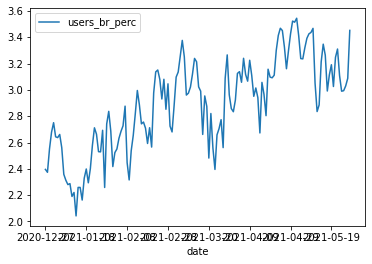

In [8]:
relay_bridge_ru_df.plot('date',
                        'users_br_perc')

In [9]:
br_perc_ru_df = relay_bridge_ru_df[['date', 'users_bridge', 'users_relay', 'users_br_perc']]

Do the same for ukrainian data:

In [11]:
bridge_ua_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2020-12-27-ua-2021-05-28.csv',
                           skiprows=5)
relay_ua_df = pd.read_csv('user_relay_data/userstats-relay-country-2020-12-27-ua-2021-05-28-off.csv',
                          skiprows=5)

In [12]:
relay_bridge_ua_df = bridge_ua_df.merge(relay_ua_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_ua_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2020-12-27,ua,635,91,49319,0.0,128893.0,87
1,2020-12-28,ua,642,94,50568,4686.0,112163.0,89
2,2020-12-29,ua,689,86,49571,13035.0,106511.0,89
3,2020-12-30,ua,701,85,48786,18146.0,98768.0,89
4,2020-12-31,ua,624,86,45661,185.0,116161.0,90
...,...,...,...,...,...,...,...,...
145,2021-05-24,ua,662,79,46276,27190.0,62185.0,85
146,2021-05-25,ua,678,80,45477,32977.0,57218.0,85
147,2021-05-26,ua,685,79,44847,24555.0,65964.0,85
148,2021-05-27,ua,701,78,43536,27890.0,58905.0,86


In [13]:
relay_bridge_ua_df['users_br_perc'] = relay_bridge_ua_df['users_bridge'] / \
                                      (relay_bridge_ua_df['users_relay'] + \
                                       relay_bridge_ua_df['users_bridge']) * 100

In [14]:
relay_bridge_ua_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay,users_br_perc
0,2020-12-27,ua,635,91,49319,0.0,128893.0,87,1.271169
1,2020-12-28,ua,642,94,50568,4686.0,112163.0,89,1.253661
2,2020-12-29,ua,689,86,49571,13035.0,106511.0,89,1.370871
3,2020-12-30,ua,701,85,48786,18146.0,98768.0,89,1.416534
4,2020-12-31,ua,624,86,45661,185.0,116161.0,90,1.348169
...,...,...,...,...,...,...,...,...,...
145,2021-05-24,ua,662,79,46276,27190.0,62185.0,85,1.410371
146,2021-05-25,ua,678,80,45477,32977.0,57218.0,85,1.468963
147,2021-05-26,ua,685,79,44847,24555.0,65964.0,85,1.504436
148,2021-05-27,ua,701,78,43536,27890.0,58905.0,86,1.584646


<AxesSubplot:xlabel='date'>

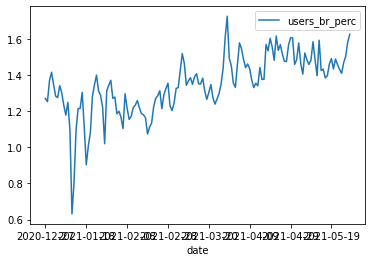

In [15]:
relay_bridge_ua_df.plot('date',
                        'users_br_perc')

In [16]:
br_perc_ua_df = relay_bridge_ua_df[['date', 'users_bridge', 'users_relay', 'users_br_perc']]
br_perc_ua_df

,date,users_bridge,users_relay,users_br_perc
0,2020-12-27,635,49319,1.271169
1,2020-12-28,642,50568,1.253661
2,2020-12-29,689,49571,1.370871
3,2020-12-30,701,48786,1.416534
4,2020-12-31,624,45661,1.348169
...,...,...,...,...
145,2021-05-24,662,46276,1.410371
146,2021-05-25,678,45477,1.468963
147,2021-05-26,685,44847,1.504436
148,2021-05-27,701,43536,1.584646


In [17]:
ukr_rus_df = br_perc_ua_df.merge(br_perc_ru_df, 
                    on='date',
                    how='inner',
                    suffixes=['_ukr', '_rus'])
ukr_rus_df

,date,users_bridge_ukr,users_relay_ukr,users_br_perc_ukr,users_bridge_rus,users_relay_rus,users_br_perc_rus
0,2020-12-27,635,49319,1.271169,8223,335037,2.395560
1,2020-12-28,642,50568,1.253661,8349,343418,2.373446
2,2020-12-29,689,49571,1.370871,8982,343044,2.551516
3,2020-12-30,701,48786,1.416534,9406,341685,2.679078
4,2020-12-31,624,45661,1.348169,8820,311808,2.750851
...,...,...,...,...,...,...,...
145,2021-05-24,662,46276,1.410371,9563,310216,2.990503
146,2021-05-25,678,45477,1.468963,9684,313739,2.994221
147,2021-05-26,685,44847,1.504436,9690,310039,3.030692
148,2021-05-27,701,43536,1.584646,9757,306166,3.088411


For all users:

In [18]:
bridge_all_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2020-12-27-all-2021-05-28.csv',
                           skiprows=5)
relay_all_df = pd.read_csv('user_relay_data/userstats-relay-country-2020-12-27-all-2021-05-28-off.csv',
                          skiprows=5)

In [19]:
relay_bridge_all_df = bridge_all_df.merge(relay_all_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_all_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2020-12-27,NaN,37592,91,2244586,NaN,NaN,87
1,2020-12-28,NaN,38468,94,2326926,NaN,NaN,89
2,2020-12-29,NaN,40258,86,2318827,NaN,NaN,89
3,2020-12-30,NaN,40872,85,2271025,NaN,NaN,89
4,2020-12-31,NaN,38128,86,2131874,NaN,NaN,90
...,...,...,...,...,...,...,...,...
145,2021-05-24,NaN,45278,79,2144623,NaN,NaN,85
146,2021-05-25,NaN,45206,80,2133619,NaN,NaN,85
147,2021-05-26,NaN,45686,79,2114662,NaN,NaN,85
148,2021-05-27,NaN,47204,78,2071291,NaN,NaN,86


In [20]:
relay_bridge_all_df['users_br_perc'] = relay_bridge_all_df['users_bridge'] / \
                                      (relay_bridge_all_df['users_relay'] + \
                                       relay_bridge_all_df['users_bridge']) * 100

In [21]:
relay_bridge_all_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay,users_br_perc
0,2020-12-27,NaN,37592,91,2244586,NaN,NaN,87,1.647198
1,2020-12-28,NaN,38468,94,2326926,NaN,NaN,89,1.626283
2,2020-12-29,NaN,40258,86,2318827,NaN,NaN,89,1.706509
3,2020-12-30,NaN,40872,85,2271025,NaN,NaN,89,1.767899
4,2020-12-31,NaN,38128,86,2131874,NaN,NaN,90,1.757049
...,...,...,...,...,...,...,...,...,...
145,2021-05-24,NaN,45278,79,2144623,NaN,NaN,85,2.067582
146,2021-05-25,NaN,45206,80,2133619,NaN,NaN,85,2.074788
147,2021-05-26,NaN,45686,79,2114662,NaN,NaN,85,2.114752
148,2021-05-27,NaN,47204,78,2071291,NaN,NaN,86,2.228186


<AxesSubplot:xlabel='date'>

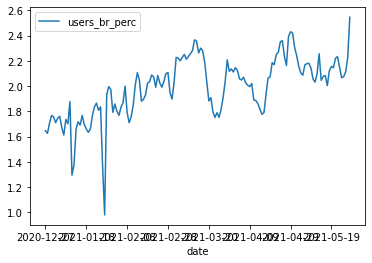

In [22]:
relay_bridge_all_df.plot('date',
                        'users_br_perc')

In [23]:
br_perc_all_df = relay_bridge_all_df[['date', 'users_bridge', 'users_relay', 'users_br_perc']]

ukr_rus_all_df = ukr_rus_df.merge(br_perc_all_df, 
                    on='date',
                    how='inner',
                    suffixes=['_bc', '_total'])
ukr_rus_all_df

,date,users_bridge_ukr,users_relay_ukr,users_br_perc_ukr,users_bridge_rus,users_relay_rus,users_br_perc_rus,users_bridge,users_relay,users_br_perc
0,2020-12-27,635,49319,1.271169,8223,335037,2.395560,37592,2244586,1.647198
1,2020-12-28,642,50568,1.253661,8349,343418,2.373446,38468,2326926,1.626283
2,2020-12-29,689,49571,1.370871,8982,343044,2.551516,40258,2318827,1.706509
3,2020-12-30,701,48786,1.416534,9406,341685,2.679078,40872,2271025,1.767899
4,2020-12-31,624,45661,1.348169,8820,311808,2.750851,38128,2131874,1.757049
...,...,...,...,...,...,...,...,...,...,...
145,2021-05-24,662,46276,1.410371,9563,310216,2.990503,45278,2144623,2.067582
146,2021-05-25,678,45477,1.468963,9684,313739,2.994221,45206,2133619,2.074788
147,2021-05-26,685,44847,1.504436,9690,310039,3.030692,45686,2114662,2.114752
148,2021-05-27,701,43536,1.584646,9757,306166,3.088411,47204,2071291,2.228186


In [24]:
ukr_rus_all_df.to_csv('relay_bridge_2021-2022_data.csv', index=False)

Let's add relay/bridge for Iran

In [27]:
bridge_ir_df = pd.read_csv('user_bridge_data/userstats-bridge-country-2020-12-27-ir-2021-05-28.csv',
                           skiprows=5)
relay_ir_df = pd.read_csv('user_relay_data/userstats-relay-country-2020-12-27-ir-2021-05-28-off.csv',
                          skiprows=5)

In [28]:
relay_bridge_ir_df = bridge_ir_df.merge(relay_ir_df, 
                                        on=['date', 'country'], 
                                        how='inner', 
                                        suffixes=['_bridge', '_relay'])
relay_bridge_ir_df

,date,country,users_bridge,frac_bridge,users_relay,lower,upper,frac_relay
0,2020-12-27,ir,5467,91,28107,0.0,113385.0,87
1,2020-12-28,ir,5407,94,33157,3758.0,90302.0,89
2,2020-12-29,ir,5463,86,36697,7972.0,65700.0,89
3,2020-12-30,ir,5306,85,36272,5679.0,31678.0,89
4,2020-12-31,ir,4705,86,34314,38.0,24905.0,90
...,...,...,...,...,...,...,...,...
145,2021-05-24,ir,3203,79,32343,20643.0,47457.0,85
146,2021-05-25,ir,3277,80,32759,23461.0,40972.0,85
147,2021-05-26,ir,3271,79,32933,15636.0,42384.0,85
148,2021-05-27,ir,3073,78,30817,16883.0,36019.0,86


In [29]:
relay_bridge_ir_df['users_br_perc'] = relay_bridge_ir_df['users_bridge'] / \
                                      (relay_bridge_ir_df['users_relay'] + \
                                       relay_bridge_ir_df['users_bridge']) * 100

relay_bridge_ir_df.rename(columns={'users_bridge':'users_bridge_ir',
                                   'users_relay':'users_relay_ir',
                                   'users_br_perc':'users_br_perc_ir'}, inplace=True)

In [30]:
br_perc_ir_df = relay_bridge_ir_df[['date', 'users_bridge_ir', 'users_relay_ir', 'users_br_perc_ir']]

ukr_rus_ir_all_df = ukr_rus_all_df.merge(br_perc_ir_df, 
                    on='date',
                    how='inner',
                    suffixes=None)

ukr_rus_ir_all_df.to_csv('ukr_rus_ir_all_bridge_relay_2020-2021.csv', index=False)

/var/folders/4x/tkx04hw96mv2b5sr5mnp_5b80000gp/T/ipykernel_7155/579426159.py:3: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  ukr_rus_ir_all_df = ukr_rus_all_df.merge(br_perc_ir_df,


In [31]:
ukr_rus_ir_all_df

,date,users_bridge_ukr,users_relay_ukr,users_br_perc_ukr,users_bridge_rus,users_relay_rus,users_br_perc_rus,users_bridge,users_relay,users_br_perc,users_bridge_ir,users_relay_ir,users_br_perc_ir
0,2020-12-27,635,49319,1.271169,8223,335037,2.395560,37592,2244586,1.647198,5467,28107,16.283434
1,2020-12-28,642,50568,1.253661,8349,343418,2.373446,38468,2326926,1.626283,5407,33157,14.020848
2,2020-12-29,689,49571,1.370871,8982,343044,2.551516,40258,2318827,1.706509,5463,36697,12.957780
3,2020-12-30,701,48786,1.416534,9406,341685,2.679078,40872,2271025,1.767899,5306,36272,12.761557
4,2020-12-31,624,45661,1.348169,8820,311808,2.750851,38128,2131874,1.757049,4705,34314,12.058228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2021-05-24,662,46276,1.410371,9563,310216,2.990503,45278,2144623,2.067582,3203,32343,9.010859
146,2021-05-25,678,45477,1.468963,9684,313739,2.994221,45206,2133619,2.074788,3277,32759,9.093684
147,2021-05-26,685,44847,1.504436,9690,310039,3.030692,45686,2114662,2.114752,3271,32933,9.034913
148,2021-05-27,701,43536,1.584646,9757,306166,3.088411,47204,2071291,2.228186,3073,30817,9.067572
